# Detect Seasonality

In [2]:
import gdown

url = "https://drive.google.com/uc?id=12O8m6-Lt8s0ujMI_wRzubCSVk3a_Kkzd"
output = "google-analytics-20210601-20210802.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=12O8m6-Lt8s0ujMI_wRzubCSVk3a_Kkzd
To: /Users/khuyen/Data-science/time_series/google-analytics-20210601-20210802.csv
100%|██████████| 13.8k/13.8k [00:00<00:00, 5.16MB/s]


'google-analytics-20210601-20210802.csv'

In [3]:
import pandas as pd
from IPython.core.pylabtools import figsize

figsize(20, 10)

In [4]:
df = pd.read_csv("google-analytics-20210601-20210802.csv")

In [5]:
df

Hour Index  Users
0              0      2
1              1      3
2              2      4
3              3      2
4              4      4
...          ...    ...
1507        1507      5
1508        1508      4
1509        1509      3
1510        1510      2
1511        1511      3

[1512 rows x 2 columns]

In [6]:
datetime_index = pd.date_range("06-01-2021", "08-03-2021", freq="1h")
datetime_index = datetime_index[:-1]

In [7]:
df["Hour Index"] = datetime_index

In [8]:
df

Hour Index  Users
0    2021-06-01 00:00:00      2
1    2021-06-01 01:00:00      3
2    2021-06-01 02:00:00      4
3    2021-06-01 03:00:00      2
4    2021-06-01 04:00:00      4
...                  ...    ...
1507 2021-08-02 19:00:00      5
1508 2021-08-02 20:00:00      4
1509 2021-08-02 21:00:00      3
1510 2021-08-02 22:00:00      2
1511 2021-08-02 23:00:00      3

[1512 rows x 2 columns]

In [9]:
import plotly_express as px

In [10]:
fig = px.line(df, x="Hour Index", y="Users")
fig

In [11]:
def plot_date(day: str, df: pd.DataFrame):
    day1 = df[
        (df["Hour Index"] >= f"{day} 00:00:00")
        & (df["Hour Index"] <= f"{day} 23:00:00")
    ]
    day1.set_index("Hour Index").plot()

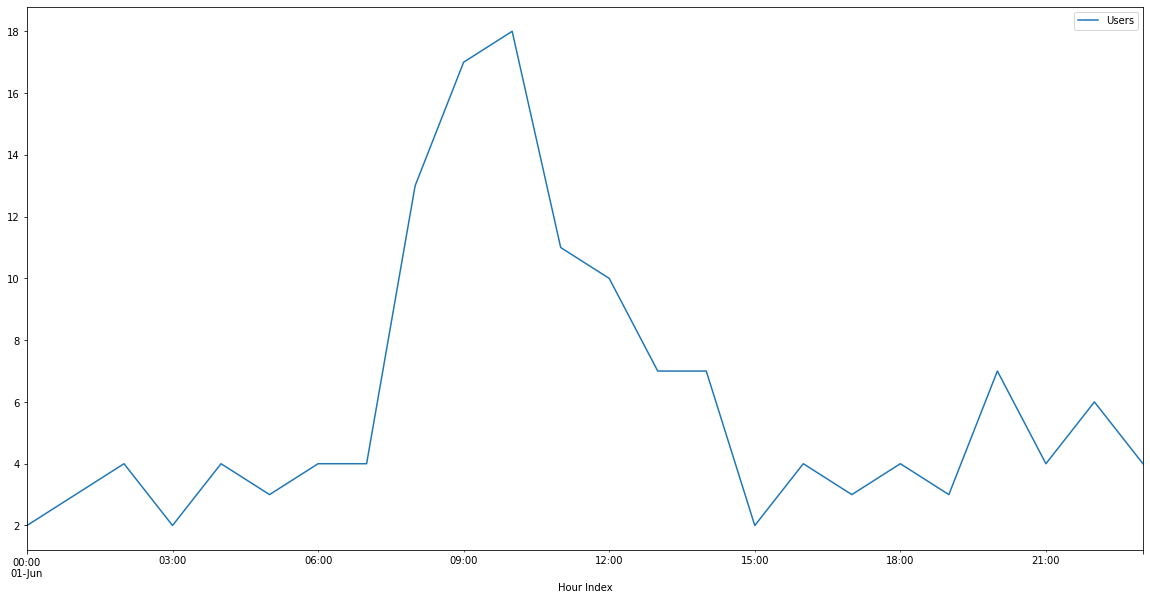

In [12]:
plot_date("2021-06-01", df)

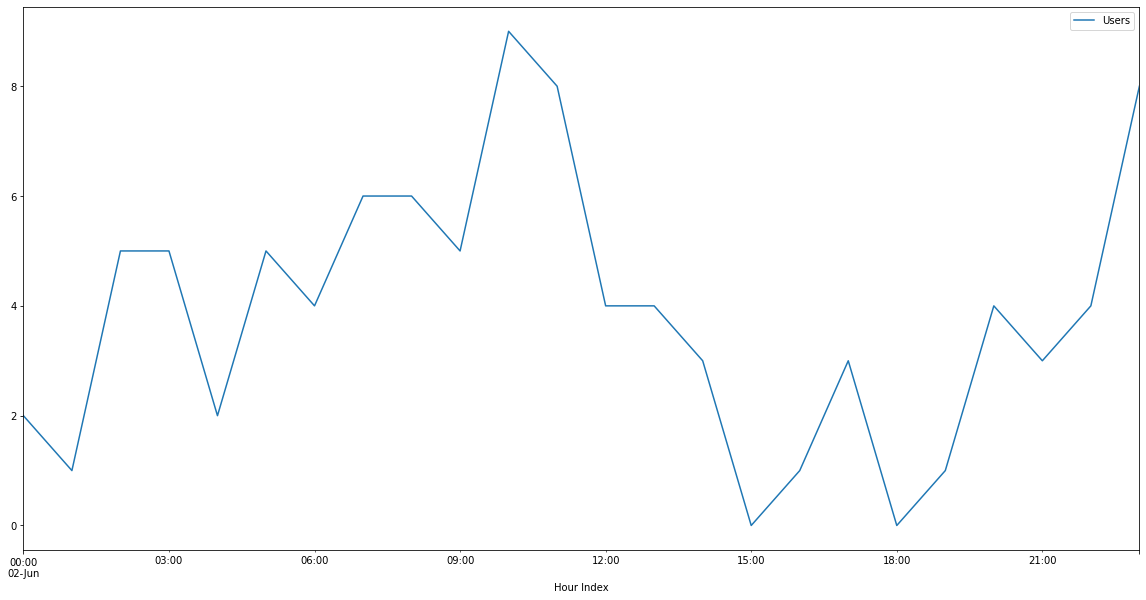

In [13]:
plot_date("2021-06-02", df)

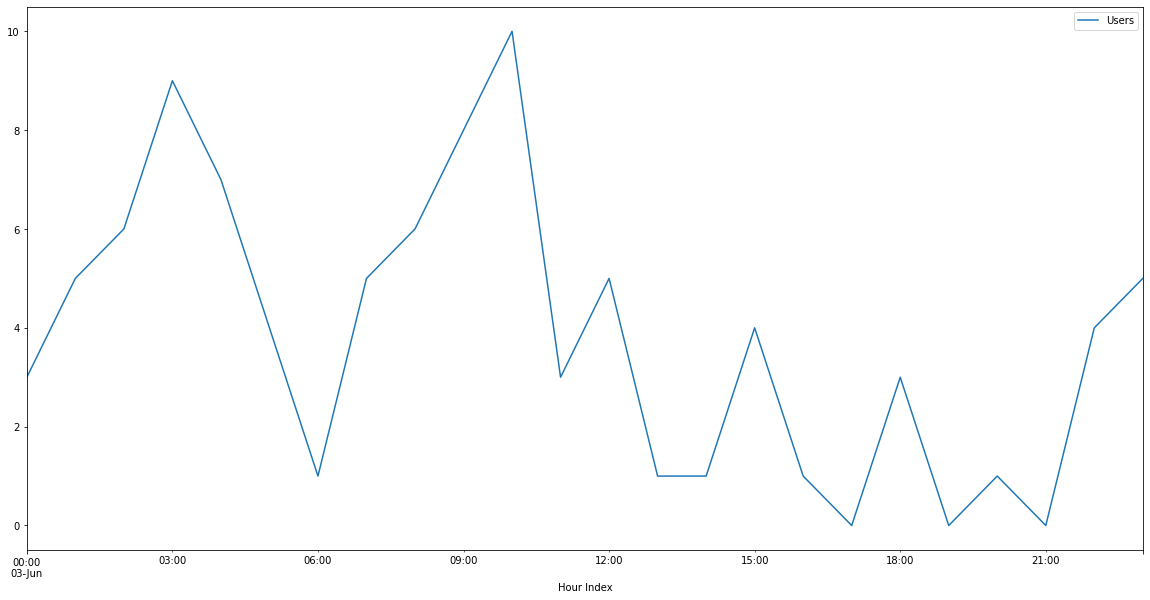

In [14]:
plot_date("2021-06-03", df)

## Seasonality Decomposition

In [15]:
df = df.rename(columns={"Hour Index": "time", "Users": "value"})

In [16]:
from kats.consts import TimeSeriesData

In [17]:
ts = TimeSeriesData(df)

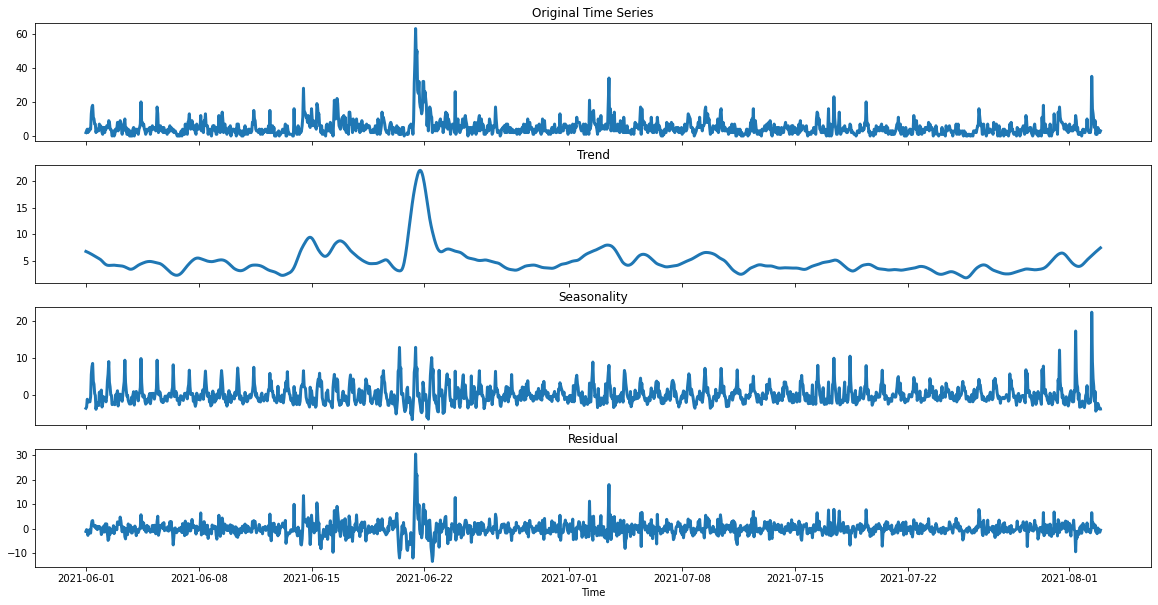

In [18]:
from kats.utils.decomposition import TimeSeriesDecomposition

decomposer = TimeSeriesDecomposition(ts, decomposition="additive")
results = decomposer.decomposer()
fig = decomposer.plot()

In [20]:
results["seasonal"][results["seasonal"].time >= f"2021-06-01 00:00:00"]

time    season
0    2021-06-01 00:00:00 -3.696315
1    2021-06-01 01:00:00 -3.381569
2    2021-06-01 02:00:00 -1.252028
3    2021-06-01 03:00:00 -1.910862
4    2021-06-01 04:00:00 -1.979776
...                  ...       ...
1507 2021-08-02 19:00:00 -2.364488
1508 2021-08-02 20:00:00 -2.930094
1509 2021-08-02 21:00:00 -3.444705
1510 2021-08-02 22:00:00 -3.934897
1511 2021-08-02 23:00:00 -3.904887

[1512 rows x 2 columns]

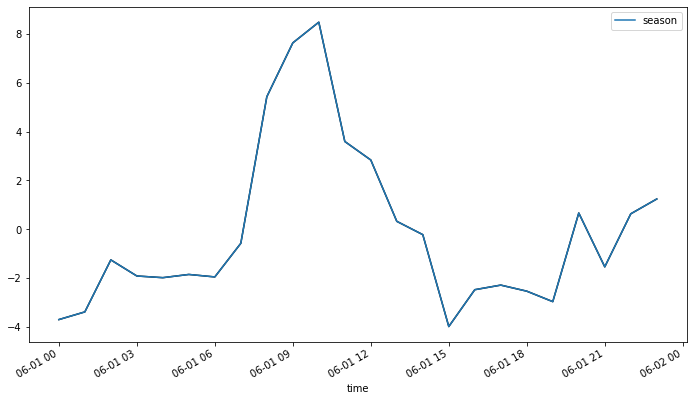

In [21]:
def plot_season_in_a_day(day: str, seasonal: pd.DataFrame):
    day1 = seasonal[
        (seasonal.time >= f"{day} 00:00:00") & (seasonal.time <= f"{day} 23:00:00")
    ]
    day1.plot(cols=["season"])


plot_season_in_a_day("2021-06-01", results["seasonal"])

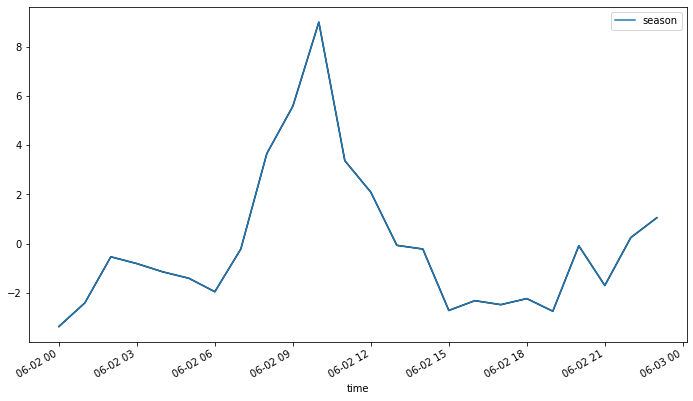

In [22]:
plot_season_in_a_day("2021-06-02", results["seasonal"])

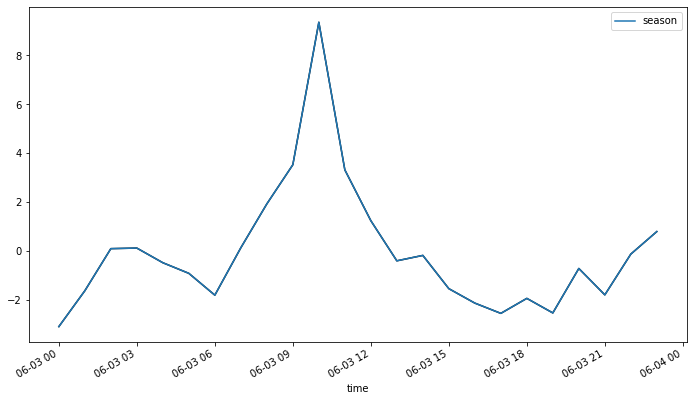

In [23]:
plot_season_in_a_day("2021-06-03", results["seasonal"])

## Kats FFTDetector

In [24]:
from kats.detectors.seasonality import FFTDetector

In [25]:
fft_detector = FFTDetector(ts)

In [26]:
fft_detector.detector()

{'seasonality_presence': True, 'seasonalities': [56.0, 24.0]}

# Detect Change Point

## Detect an Up/Down Shift of Means

In [27]:
url = "https://drive.google.com/uc?id=1i1Yz3-rfjuemc7bD1IXpvb7c1kTOw09b"
output = "google-analytics-20210101-20210802-days.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1i1Yz3-rfjuemc7bD1IXpvb7c1kTOw09b
To: /Users/khuyen/Data-science/time_series/google-analytics-20210101-20210802-days.csv
100%|██████████| 2.38k/2.38k [00:00<00:00, 1.78MB/s]


'google-analytics-20210101-20210802-days.csv'

In [28]:
day_df = pd.read_csv(
    "google-analytics-20210101-20210802-days.csv", parse_dates=["Day Index"]
)

In [29]:
day_df

Day Index  Users
0   2021-01-01     31
1   2021-01-02     41
2   2021-01-03     58
3   2021-01-04     56
4   2021-01-05     44
..         ...    ...
209 2021-07-29     85
210 2021-07-30     76
211 2021-07-31    149
212 2021-08-01     85
213 2021-08-02    134

[214 rows x 2 columns]

In [30]:
fig = px.line(day_df, x="Day Index", y="Users")
fig

In [31]:
day_df = day_df.rename(columns={"Day Index": "time", "Users": "value"})
ts_day = TimeSeriesData(day_df)
ts_day

time  value
0   2021-01-01     31
1   2021-01-02     41
2   2021-01-03     58
3   2021-01-04     56
4   2021-01-05     44
..         ...    ...
209 2021-07-29     85
210 2021-07-30     76
211 2021-07-31    149
212 2021-08-01     85
213 2021-08-02    134

[214 rows x 2 columns]

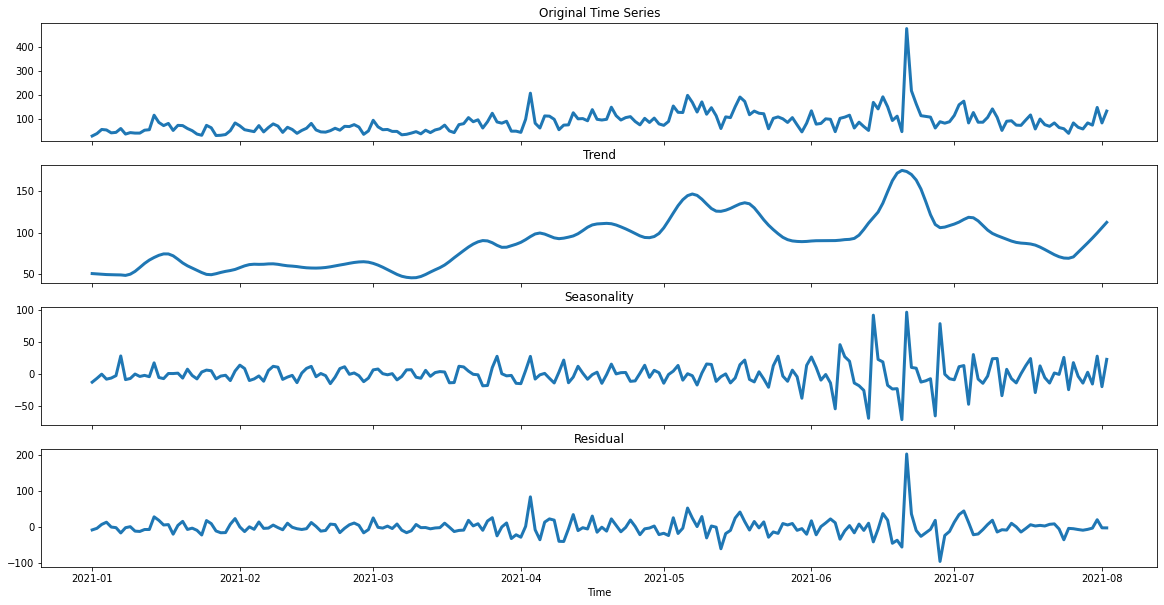

In [32]:
decomposer = TimeSeriesDecomposition(ts_day, decomposition="additive")
results = decomposer.decomposer()
fig = decomposer.plot()

In [33]:
from kats.detectors.cusum_detection import CUSUMDetector

cumsum_detector = CUSUMDetector(ts_day)
changepoints = cumsum_detector.detector()
print(changepoints[0][0])

TimeSeriesChangePoint(start_time: 2021-04-01 00:00:00, end_time: 2021-04-01 00:00:00, confidence: 0.9999999999999967)


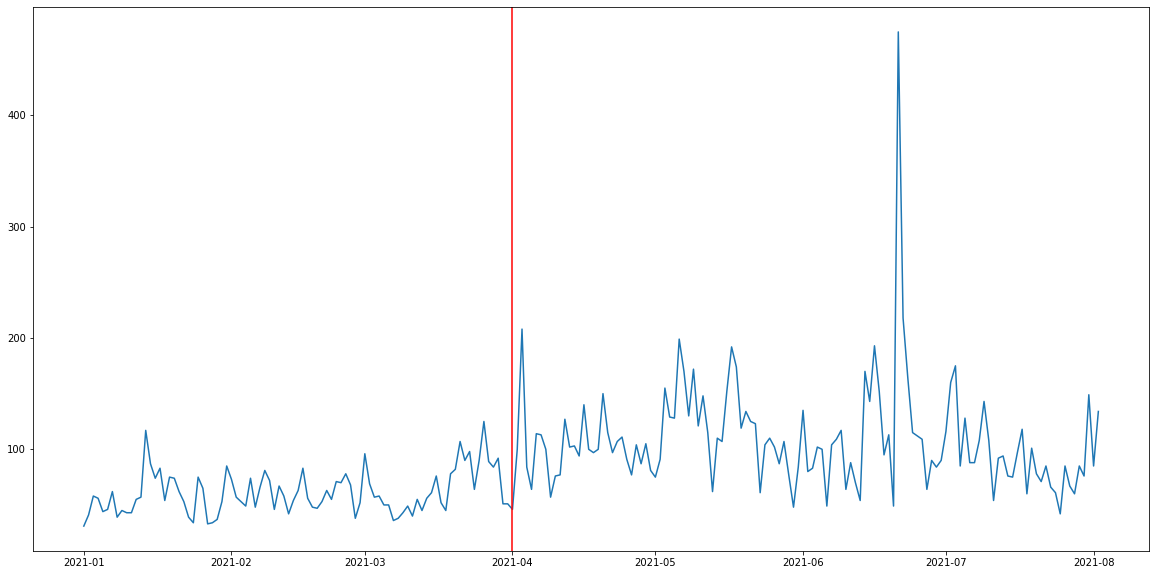

In [34]:
cumsum_detector.plot(changepoints)

## Detect Sudden Changes

In [35]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

bocpd_detector = BOCPDetector(ts_day)

changepoints = bocpd_detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, changepoint_prior=0.01
)
for changepoint in changepoints:
    print(changepoint[0])

TimeSeriesChangePoint(start_time: 2021-06-14T00:00:00.000000000, end_time: 2021-06-14T00:00:00.000000000, confidence: 0.74723810504334)
TimeSeriesChangePoint(start_time: 2021-06-23T00:00:00.000000000, end_time: 2021-06-23T00:00:00.000000000, confidence: 0.5250604974512938)


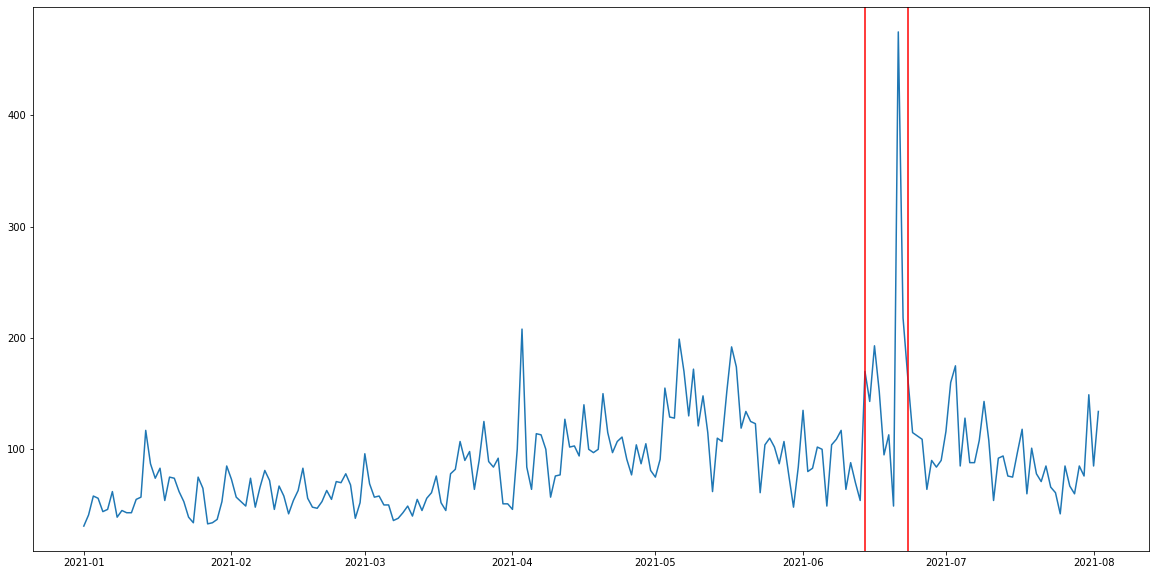

In [36]:
bocpd_detector.plot(changepoints)

# Outlier detection

In [37]:
from kats.detectors.outlier import OutlierDetector

outlier_detector = OutlierDetector(ts_day, "additive")

In [38]:
outlier_detector.detector()
outliers = outlier_detector.outliers
outliers[0]

[Timestamp('2021-04-03 00:00:00'),
 Timestamp('2021-06-20 00:00:00'),
 Timestamp('2021-06-21 00:00:00')]

In [39]:
ts_day_outliers_interpolated = outlier_detector.remover(interpolate=True)

In [40]:
from matplotlib import pyplot as plt

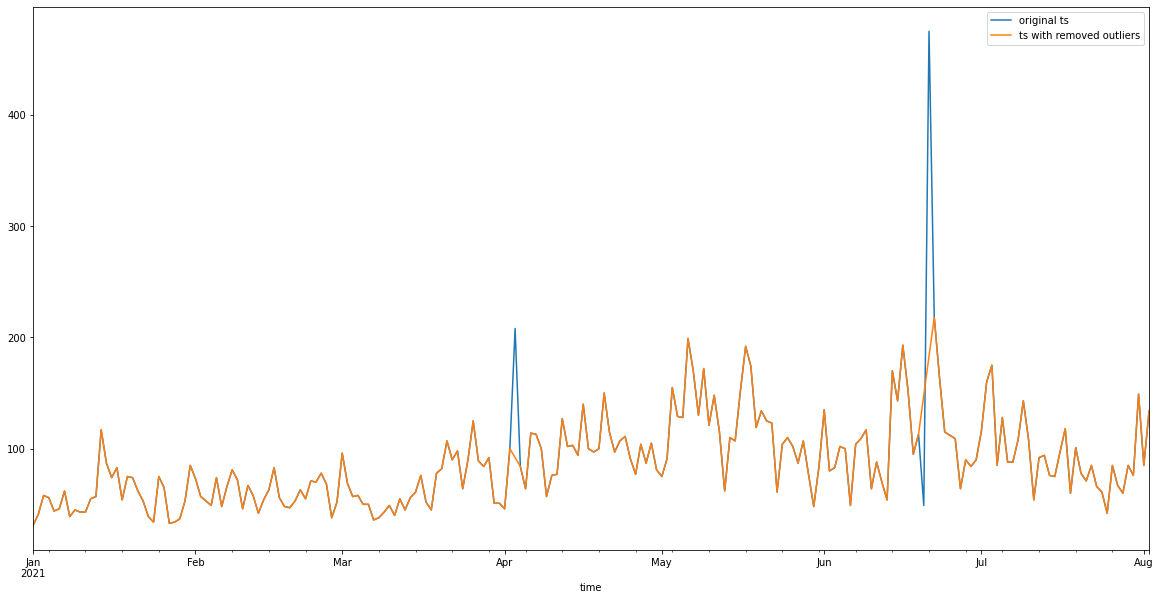

In [41]:
ax = ts_day.to_dataframe().plot(x="time", y="value")
ts_day_outliers_interpolated.to_dataframe().plot(x="time", y="y_0", ax=ax)
plt.legend(labels=["original ts", "ts with removed outliers"])
plt.show()